# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [30]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

## Step1. 下載資料

In [31]:
breast_cancer=datasets.load_breast_cancer()

# features=breast_cancer.data
features=breast_cancer.data
target=breast_cancer.target

#features

#print(breast_cancer.keys())
#print(breast_cancer.feature_names)
#print(breast_cancer.target_names)

# Reduce attributes
selected_feature_names = ['mean radius', 'mean texture'] #['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean symmetry', 'mean fractal dimension']
# 根據特徵名稱從 cancer.feature_names 中獲取對應的索引
selected_feature_indices = [i for i, name in enumerate(breast_cancer.feature_names) if name in selected_feature_names]
# 根據選定的特徵索引從 features 中取得相應的特徵陣列
selected_features = features[:, selected_feature_indices]
print(selected_features)

[[17.99 10.38]
 [20.57 17.77]
 [19.69 21.25]
 ...
 [16.6  28.08]
 [20.6  29.33]
 [ 7.76 24.54]]


## Step2. 區分訓練集與測試集

In [32]:
# 區分訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)


## Step3. 建模

In [33]:
# 建立支持向量機回歸模型
model = svm.SVR(kernel='rbf')

# 訓練模型
model.fit(X_train, y_train)

SVR()

## Step4. 預測

```

```


In [34]:
y_pred = model.predict(X_test)

## Step5. 準確度分析

In [35]:
# 計算預測準確度
print("R2 score: ", model.score(X_test, y_test))

# 計算均方誤差
mse = mean_squared_error(y_test, y_pred)
print("MSE score: ", mse)

R2 score:  0.7209257301316284
MSE score:  0.06555969112866562


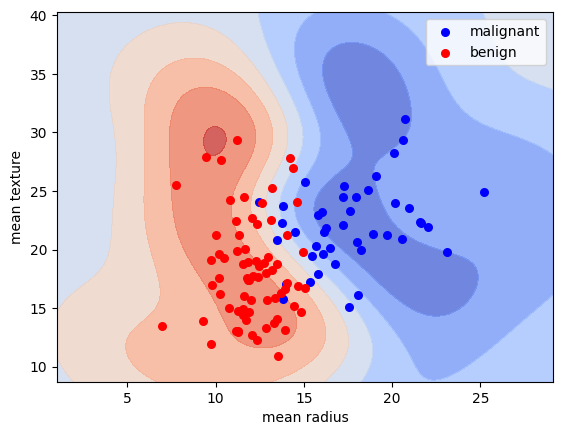

In [36]:
# 繪製分類邊界線
l, r = selected_features[:, 0].min() - 1, selected_features[:, 0].max() + 1
b, t = selected_features[:, 1].min() - 1, selected_features[:, 1].max() + 1
n = 500

# 生成網格
grid_x, grid_y = np.meshgrid(np.linspace(1, r, n), np.linspace(b, t, n))
mesh_x = np.column_stack((grid_x.ravel(), grid_y.ravel()))

# 使用模型進行預測
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)

# 繪製目標值和預測值的散點圖
plt.contourf(grid_x, grid_y, grid_z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test[y_test == 0,0], X_test[y_test == 0,1], s = 30, c ='b', label = 'malignant')
plt.scatter(X_test[y_test == 1,0], X_test[y_test == 1,1], s = 30, c ='r', label = 'benign')

# 加上標籤和標題
plt.xlabel(selected_feature_names[0])
plt.ylabel(selected_feature_names[1])
plt.legend()
plt.show()